In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
df = pd.read_csv('ds_salaries.csv')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [92]:
df.head(10)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


In [17]:
df.describe(include='object').T

,count,unique,top,freq
experience_level,3755,4,SE,2516
employment_type,3755,4,FT,3718
job_title,3755,93,Data Engineer,1040
salary_currency,3755,20,USD,3224
employee_residence,3755,78,US,3004
company_location,3755,72,US,3040
company_size,3755,3,M,3153


Форматирование данных

In [22]:
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [26]:
df.duplicated().sum()

df.drop_duplicates(inplace = True)
df.duplicated().sum()

np.int64(0)

### Какие самые высокооплачиваемые должности? Есть ли выбросы в заработной плате? В каких должностях?

In [29]:
avg_salary = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending = False)

avg_salary.head(10)

,salary_in_usd
job_title,
Data Science Tech Lead,375000.000000
Cloud Data Architect,250000.000000
Data Lead,212500.000000
Data Analytics Lead,211254.500000
Principal Data Scientist,198171.125000
Director of Data Science,195140.727273
Principal Data Engineer,192500.000000
Machine Learning Software Engineer,192420.000000
Applied Scientist,190342.580645


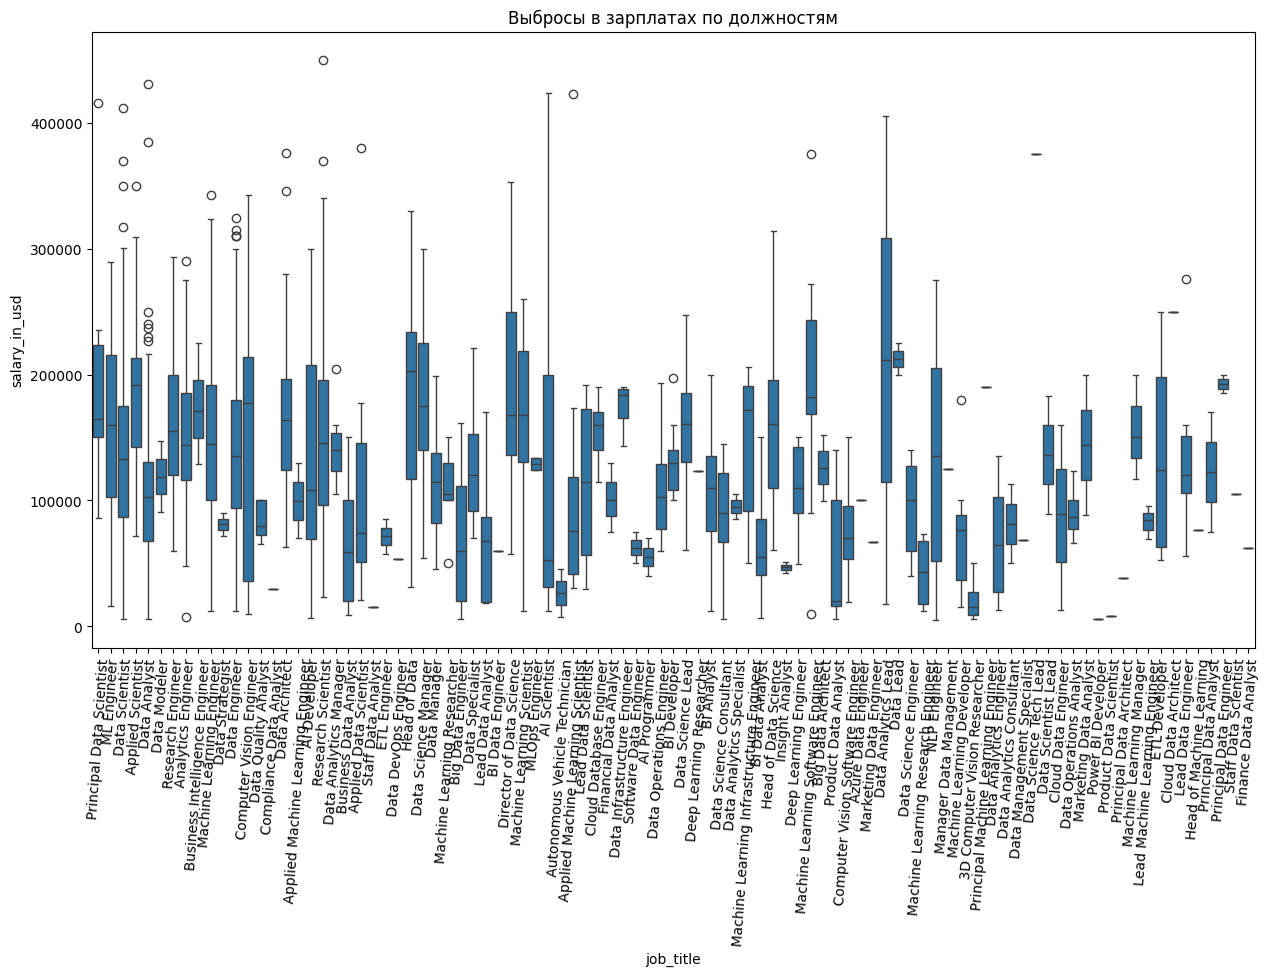

In [43]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='job_title', y='salary_in_usd', data=df)
plt.xticks(rotation=86)
plt.title('Выбросы в зарплатах по должностям')
plt.show()

## Влияет ли удаленная работа на зарплату? Есть ли корреляция?

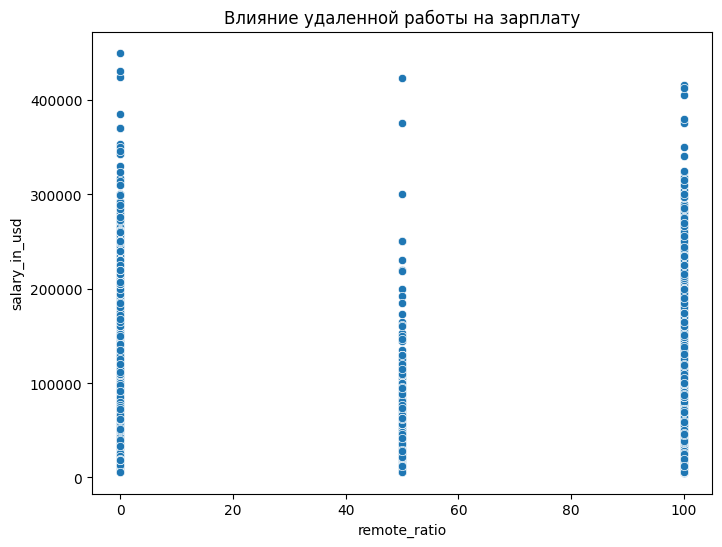

In [48]:
coller = df.groupby('remote_ratio')['salary_in_usd'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='remote_ratio', y='salary_in_usd', data=df)
plt.title('Влияние удаленной работы на зарплату')
plt.show()

Вид работы не влияет на уровень зарплаы. Корреляция не найдена



## Зависит ли заработная плата от размера предприятия?

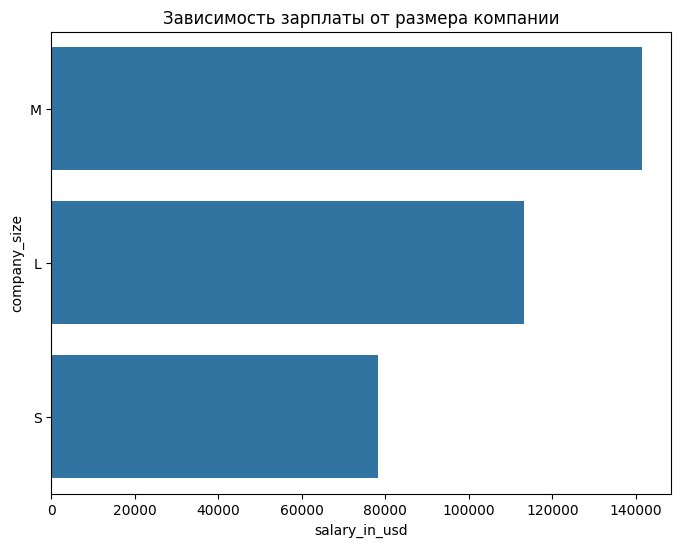

In [60]:
salary_by_size = df.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=salary_by_size, y=salary_by_size.index, orient='h')
plt.title('Зависимость зарплаты от размера компании')
plt.show()

# Какие страны наиболее популярны среди вакансий? В каких заработная плата выше, а в каких ниже?

In [66]:
top_countries = df['company_location'].value_counts()
top_countries.head(10)

,count
company_location,
US,1929
GB,155
CA,83
IN,57
DE,55
ES,44
FR,33
BR,15
AU,14


In [71]:
avg_salary_by_country = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)
print("\nТоп стран по средней зарплате:")
print(avg_salary_by_country.head(10))
print("\nТоп стран по самой низкой средней зарплате:")
print(avg_salary_by_country.tail(10))


Топ стран по средней зарплате:
company_location
IL    271446.500000
PR    167500.000000
US    152374.791602
RU    140333.333333
CA    130572.759036
NZ    125000.000000
BA    120000.000000
IE    114943.428571
JP    114127.333333
SE    105000.000000
Name: salary_in_usd, dtype: float64

Топ стран по самой низкой средней зарплате:
company_location
PK    20000.0
TR    19058.0
GH    18500.0
MD    18000.0
SK    12608.0
VN    12000.0
AL    10000.0
MA    10000.0
BO     7500.0
MK     6304.0
Name: salary_in_usd, dtype: float64


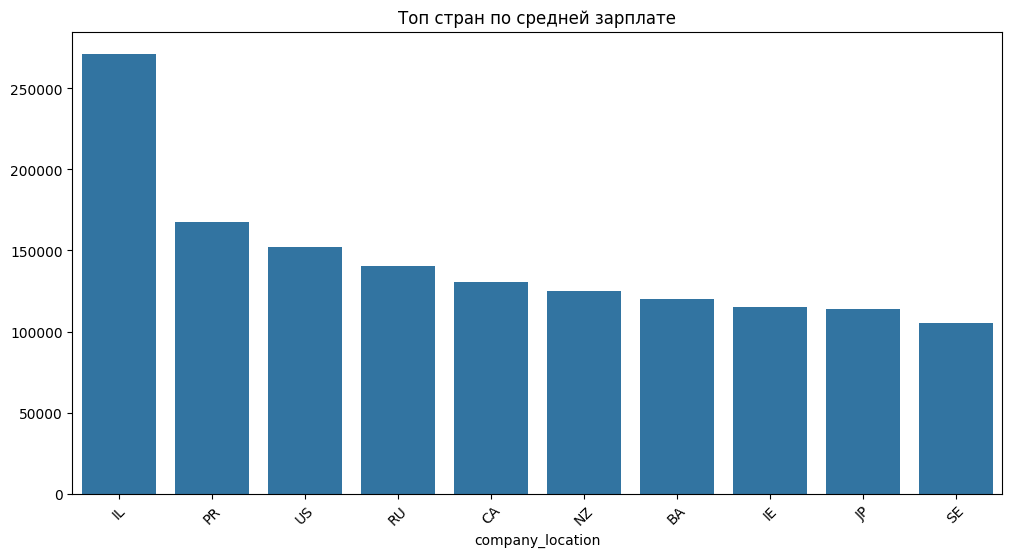

In [72]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_salary_by_country.index[:10], y=avg_salary_by_country.values[:10])
plt.xticks(rotation=45)
plt.title('Топ стран по средней зарплате')
plt.show()

# Оцените медианную зарплату для каждой должности.

In [77]:
med_salary = df.groupby('job_title')['salary_in_usd'].median().sort_values(ascending= False)

med_salary.head(20)

,salary_in_usd
job_title,
Data Science Tech Lead,375000.0
Cloud Data Architect,250000.0
Data Lead,212500.0
Data Analytics Lead,211254.5
Head of Data,202500.0
Principal Data Engineer,192500.0
Applied Scientist,192000.0
Principal Machine Learning Engineer,190000.0
Data Infrastructure Engineer,183655.0


# Оцените, как сильно изменились зарплаты в 2023 году, относительно 2020. Какие должности стали более оплачиваемы, а какие нет?

In [120]:
df_filtered = df[df['work_year'].isin([2020, 2023])]

# Группировка по должности и году, расчет медианной зарплаты
median_salaries = df_filtered.groupby(['job_title', 'work_year'])['salary_in_usd'].median().unstack()

# Вычисление разницы зарплат (2023 - 2020)
median_salaries['Salary Change'] = median_salaries[2023] - median_salaries[2020]

# Удаление строк с NaN (должности, для которых нет данных за оба года)
median_salaries.dropna(subset=['Salary Change'], inplace=True)

# Сортировка по изменению зарплаты
median_salaries = median_salaries.sort_values(by='Salary Change', ascending=False)

# Вывод результатов
print("\nИзменение медианной зарплаты с 2020 по 2023:")
print(median_salaries['Salary Change'])


Изменение медианной зарплаты с 2020 по 2023:
job_title
AI Scientist                                185336.5
ML Engineer                                 164034.0
Computer Vision Engineer                    152500.0
Machine Learning Infrastructure Engineer    121420.0
Data Scientist                               87274.0
Data Analyst                                 73216.0
Data Engineer                                72865.5
Data Science Consultant                      39646.5
Machine Learning Engineer                     6450.0
Product Data Analyst                          3378.0
Data Science Manager                         -6817.5
Big Data Engineer                           -19879.5
BI Data Analyst                             -26103.0
Lead Data Analyst                           -43881.0
Machine Learning Scientist                  -50000.0
Principal Data Scientist                    -62414.0
Director of Data Science                    -75700.0
Business Data Analyst                      

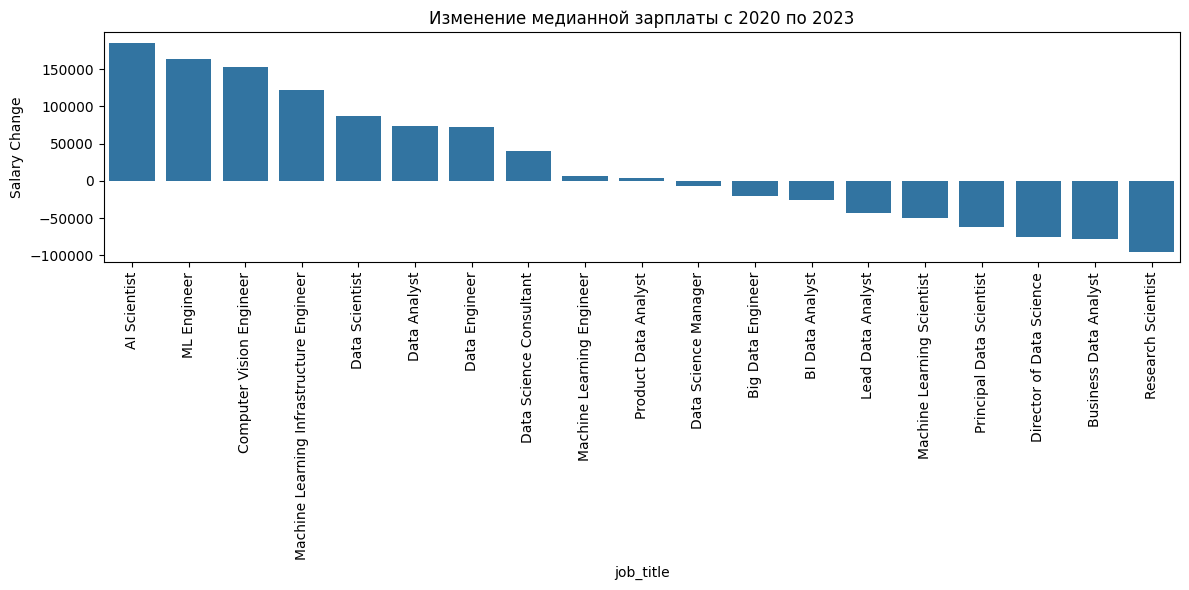

In [121]:
plt.figure(figsize=(12, 6))
sns.barplot(x=median_salaries.index, y=median_salaries['Salary Change'])
plt.xticks(rotation=90)
plt.title('Изменение медианной зарплаты с 2020 по 2023')
plt.tight_layout()
plt.show()

# Выявите портрет самого успешного и богатого работника: кем он должен работать, где проживать, удаленная ли работа.

In [122]:
top_job = df.loc[df['salary_in_usd'] == df['salary_in_usd'].max(), 'job_title'].iloc[0]
top_residence = df.loc[df['salary_in_usd'] == df['salary_in_usd'].max(), 'employee_residence'].iloc[0]
top_remote = df.loc[df['salary_in_usd'] == df['salary_in_usd'].max(), 'remote_ratio'].iloc[0]

print(f"Должность: {top_job}")
print(f"Страна проживания: {top_residence}")
print(f"СПроцентф удаленной работы: {top_remote}")


Должность: Research Scientist
Страна проживания: US
СПроцентф удаленной работы: 0


# Много ли людей работают и проживают в разных регионах? Где больше всего людей проживает и много ли из них (в процентном соотношении) работают удаленно на другую страну?

In [123]:
different_location = df[df['employee_residence'] != df['company_location']]
print("\nКоличество людей, работающих и проживающих в разных регионах:", len(different_location))

# Процент удаленно работающих на другую страну
remote_different_location = different_location[different_location['remote_ratio'] > 0]
percentage_remote_different = (len(remote_different_location) / len(different_location)) * 100
print(f"\nПроцент людей, работающих удаленно на другую страну: {percentage_remote_different:.2f}%")

# Наиболее популярная страна проживания
most_popular_residence = df['employee_residence'].value_counts().idxmax()
print("\nНаиболее популярная страна проживания:", most_popular_residence)


Количество людей, работающих и проживающих в разных регионах: 96

Процент людей, работающих удаленно на другую страну: 92.71%

Наиболее популярная страна проживания: US


# Зависимость уровня заработной платы от уровня опыта

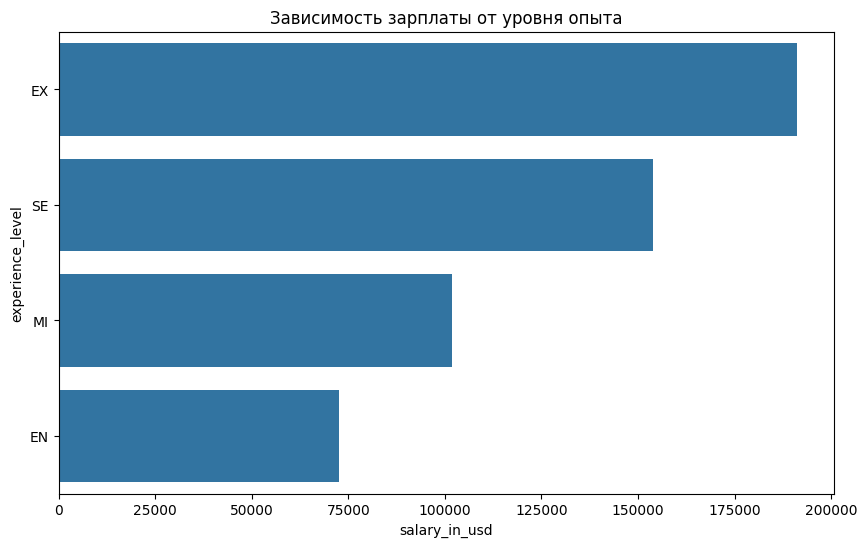

In [124]:
tmp = df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=tmp, y=tmp.index, orient='h')
plt.title('Зависимость зарплаты от уровня опыта')
plt.show()